<a href="https://colab.research.google.com/github/Wilian21/Balanceo_Datos-Clasificadores_Binarios/blob/main/T%C3%A9cnicasBalanceo-ClasificadoresBinarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

InstalaciOn libreria balanceo de datos

In [ ]:
pip install -U imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
#---------------------
from collections import Counter
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN 


LEER CSV

In [ ]:
df = pd.read_csv("pe_section_headers.csv")
df.head(5)

,hash,size_of_data,virtual_address,entropy,virtual_size,malware
0,071e8c3f8922e186e57548cd4c703a5d,443392,4096,6.529624,442984,1
1,33f8e6d08a6aae939f25a8e0d63dd523,331264,4096,6.604314,330784,1
2,b68abd064e975e1c6d5f25e748663076,74240,4096,6.046789,73819,1
3,72049be7bd30ea61297ea624ae198067,219648,4096,6.497018,219524,1
4,c9b3700a77facf29172f32df6bc77f48,262144,4096,6.638142,261943,1


In [ ]:
#Eliminar la columna hash
data= df.drop(['hash'],axis=1)
data.head()
data.shape

(43293, 5)

In [ ]:
#Verificar que los datos sean numericos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43293 entries, 0 to 43292
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   size_of_data     43293 non-null  int64  
 1   virtual_address  43293 non-null  int64  
 2   entropy          43293 non-null  float64
 3   virtual_size     43293 non-null  int64  
 4   malware          43293 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 1.7 MB


In [ ]:
#Ver si existen datos faltantes
data.isna().sum().sort_values()

size_of_data       0
virtual_address    0
entropy            0
virtual_size       0
malware            0
dtype: int64

In [ ]:
data.drop_duplicates()
print(data.shape)

(43293, 5)


NUMERO DE OBSERVACIONES BINARIAS

In [ ]:
#Ver cuantas clases existe en el dataset
print(data.groupby('malware').size())

malware
0     1725
1    41568
dtype: int64


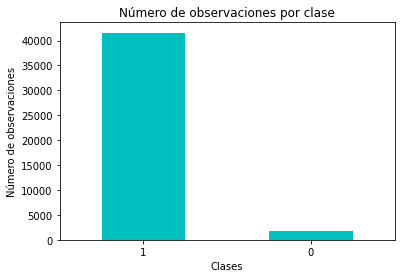

In [ ]:
count_classes = data.value_counts(data['malware'], sort = True)
count_classes.plot(kind = 'bar',rot=0, color="c")
plt.title("Número de observaciones por clase")
plt.xlabel("Clases")
plt.ylabel("Número de observaciones")
plt.show()

DIVIDIR EL DATASET EN X, Y

In [ ]:
#Division del dataset X los atributos
#Y las clases
X= data[['size_of_data','virtual_address','entropy','virtual_size']]
y = data['malware']

print(X.shape)
print(y.shape)

(43293, 4)
(43293,)


CREACION DE STRATIFIEDKFOLD

In [ ]:
# crear los 10 splits para cross validation
kf= StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

#for valores_x, valores_y in kf.split(X,y):
  #print("entrenamiento: ",data.iloc[valores_x],"prueba: ",data.iloc[valores_y])
  #print(valores_x,valores_y)
  #print('train -  {}   |   test -  {}'.format(np.bincount(y[valores_x]), np.bincount(y[valores_y])))


CREACION DE ALGORITMOS

In [ ]:
########### REGRESION LOGISTICA ##############
rl = LogisticRegression(penalty='l2', dual=False, tol=0.0001,class_weight='balanced', solver='lbfgs',
                        multi_class='ovr')

#class_weight='balanced', 
rlB = LogisticRegression(penalty='l2', dual=False, tol=0.0001,solver='lbfgs', multi_class='ovr')

########### RANDOM FOREST ##############
rf = RandomForestClassifier(n_estimators=100,bootstrap = True, criterion = 'gini')

########### RED NEURONAL ##############

mlp =MLPClassifier(hidden_layer_sizes = (50,50),activation='relu', solver='adam',alpha=0.0001)

########### NAIVE BAYES ##############
nv=GaussianNB(priors = None , var_smoothing = 1e-09)


TECNICAS DE BALANCEO DE DATOS

In [ ]:
#SMOTETOMEK
stomek = SMOTETomek(sampling_strategy='auto',random_state= None, smote=None,tomek=None)
X_stomek, y_smotek = stomek.fit_resample(X, y)

print ("Distribucion de clases antes del balanceo {}".format(Counter(y)))
print ("Distribucion de clases despues del balanceo {}".format(Counter(y_smotek )))


Distribucion de clases antes del balanceo Counter({1: 41568, 0: 1725})
Distribucion de clases despues del balanceo Counter({1: 40537, 0: 40537})


In [ ]:
#NEARMISS
near = NearMiss(sampling_strategy= 0.5, version=2, n_neighbors=3,n_neighbors_ver3=3)
X_near, y_near= near.fit_resample(X, y)

print ("Distribucion de clases antes del balanceo {}".format(Counter(y)))
print ("Distribucion de clases despues del balanceo {}".format(Counter(y_near )))


Distribucion de clases antes del balanceo Counter({1: 41568, 0: 1725})
Distribucion de clases despues del balanceo Counter({1: 3450, 0: 1725})


In [ ]:
#SMOTEEN
smoteen = SMOTEENN(sampling_strategy='auto',random_state=None, smote=None, enn=None)
X_smoteen, y_smoteen = smoteen.fit_resample(X, y)

print ("Distribucion de clases antes del balanceo {}".format(Counter(y)))
print ("Distribucion de clases despues del balanceo {}".format(Counter(y_smoteen)))


Distribucion de clases antes del balanceo Counter({1: 41568, 0: 1725})
Distribucion de clases despues del balanceo Counter({1: 37010, 0: 27310})


FUNCION DE VALIDACION CRUZADA

In [ ]:
def validacion(entrenamiento,prueba,modelo):
  start = time.time()
  ac=[]
  fs=[]
  pre=[]
  re=[]
  cont=0
  for train, test in kf.split(entrenamiento,prueba):
    cont=cont+1
    X_train, X_test = entrenamiento.iloc[train], entrenamiento.iloc[test]
    y_train, y_test = prueba.iloc[train], prueba.iloc[test]
    modelo.fit(X_train,y_train)
    y_pred = modelo.predict(X_test)
    #print(y_pred)
    conf = confusion_matrix(y_test,y_pred)
    accy = metrics.accuracy_score(y_test, y_pred)
    ac.append(accy)
    f1= metrics.f1_score(y_test, y_pred)
    fs.append(f1)
    presi = metrics.precision_score(y_test, y_pred)
    pre.append(presi)
    reca = metrics.recall_score(y_test, y_pred)
    re.append(reca)
    #print(accy,"---",f1,"---",presi,"---",reca)
    #print("MatrizConfusion")
    print("----------------- SPLIT {} ----------------------".format(cont))
    print(conf)
    print(classification_report(y_test,y_pred))
    
  print("----------Medidas de rendimiento------------")
  print('Accuracy {}'.format(np.mean(ac)))   
  print('F1-Score {}'.format(np.mean(fs)))
  print('Presicion {}'.format(np.mean(pre)))
  print('Recall {}'.format(np.mean(re)))
  end = time.time()
  print("Tiempo de ejecucion:", end - start,"seg")

REGRESION LOGISTICA SIN BALANCEO DE DATOS

In [ ]:
#REGRESION LOGISTICA SIN BALANCEO DE DATOS
validacion(X,y,rl)

----------------- SPLIT 1 ----------------------
[[   7  166]
 [   6 4151]]
              precision    recall  f1-score   support

           0       0.54      0.04      0.08       173
           1       0.96      1.00      0.98      4157

    accuracy                           0.96      4330
   macro avg       0.75      0.52      0.53      4330
weighted avg       0.94      0.96      0.94      4330

----------------- SPLIT 2 ----------------------
[[   5  168]
 [ 359 3798]]
              precision    recall  f1-score   support

           0       0.01      0.03      0.02       173
           1       0.96      0.91      0.94      4157

    accuracy                           0.88      4330
   macro avg       0.49      0.47      0.48      4330
weighted avg       0.92      0.88      0.90      4330

----------------- SPLIT 3 ----------------------
[[   3  170]
 [   0 4157]]
              precision    recall  f1-score   support

           0       1.00      0.02      0.03       173
         

REGRESION LOGISTICA CON BALANCEO DE DATOS

In [ ]:
#REGRESION LOGISTICA CON BALANCEO DE DATOS 
print("NEARMISS")
validacion(X_near,y_near,rlB)

NEARMISS
----------------- SPLIT 1 ----------------------
[[153  20]
 [  0 345]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.94       173
           1       0.95      1.00      0.97       345

    accuracy                           0.96       518
   macro avg       0.97      0.94      0.96       518
weighted avg       0.96      0.96      0.96       518

----------------- SPLIT 2 ----------------------
[[154  19]
 [  3 342]]
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       173
           1       0.95      0.99      0.97       345

    accuracy                           0.96       518
   macro avg       0.96      0.94      0.95       518
weighted avg       0.96      0.96      0.96       518

----------------- SPLIT 3 ----------------------
[[153  20]
 [  0 345]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.94       173
           1

In [ ]:
print("SMOTETOMEK")
validacion(X_stomek, y_smotek,rlB)

SMOTETOMEK
----------------- SPLIT 1 ----------------------
[[ 203 3849]
 [ 258 3794]]
              precision    recall  f1-score   support

           0       0.44      0.05      0.09      4052
           1       0.50      0.94      0.65      4052

    accuracy                           0.49      8104
   macro avg       0.47      0.49      0.37      8104
weighted avg       0.47      0.49      0.37      8104

----------------- SPLIT 2 ----------------------
[[ 211 3841]
 [ 230 3822]]
              precision    recall  f1-score   support

           0       0.48      0.05      0.09      4052
           1       0.50      0.94      0.65      4052

    accuracy                           0.50      8104
   macro avg       0.49      0.50      0.37      8104
weighted avg       0.49      0.50      0.37      8104

----------------- SPLIT 3 ----------------------
[[ 196 3856]
 [ 251 3801]]
              precision    recall  f1-score   support

           0       0.44      0.05      0.09      405

In [ ]:
print("SMOTEENN")
validacion(X_smoteen, y_smoteen,rlB)

SMOTEENN
----------------- SPLIT 1 ----------------------
[[  56 2639]
 [   0 3690]]
              precision    recall  f1-score   support

           0       1.00      0.02      0.04      2695
           1       0.58      1.00      0.74      3690

    accuracy                           0.59      6385
   macro avg       0.79      0.51      0.39      6385
weighted avg       0.76      0.59      0.44      6385

----------------- SPLIT 2 ----------------------
[[  44 2650]
 [   0 3691]]
              precision    recall  f1-score   support

           0       1.00      0.02      0.03      2694
           1       0.58      1.00      0.74      3691

    accuracy                           0.58      6385
   macro avg       0.79      0.51      0.38      6385
weighted avg       0.76      0.58      0.44      6385

----------------- SPLIT 3 ----------------------
[[  47 2647]
 [   0 3691]]
              precision    recall  f1-score   support

           0       1.00      0.02      0.03      2694


RANDOM FOREST SIN BALANCEO DE DATOS

In [ ]:
validacion(X,y,rf)

----------------- SPLIT 1 ----------------------
[[  71  102]
 [  48 4109]]
              precision    recall  f1-score   support

           0       0.60      0.41      0.49       173
           1       0.98      0.99      0.98      4157

    accuracy                           0.97      4330
   macro avg       0.79      0.70      0.73      4330
weighted avg       0.96      0.97      0.96      4330

----------------- SPLIT 2 ----------------------
[[  98   75]
 [  38 4119]]
              precision    recall  f1-score   support

           0       0.72      0.57      0.63       173
           1       0.98      0.99      0.99      4157

    accuracy                           0.97      4330
   macro avg       0.85      0.78      0.81      4330
weighted avg       0.97      0.97      0.97      4330

----------------- SPLIT 3 ----------------------
[[  82   91]
 [  39 4118]]
              precision    recall  f1-score   support

           0       0.68      0.47      0.56       173
         

RANDOM FOREST CON BALANCEO DE DATOS

In [ ]:
print("NEARMISS")
validacion(X_near,y_near,rf)

NEARMISS
----------------- SPLIT 1 ----------------------
[[164   9]
 [  4 341]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       173
           1       0.97      0.99      0.98       345

    accuracy                           0.97       518
   macro avg       0.98      0.97      0.97       518
weighted avg       0.97      0.97      0.97       518

----------------- SPLIT 2 ----------------------
[[167   6]
 [  3 342]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       173
           1       0.98      0.99      0.99       345

    accuracy                           0.98       518
   macro avg       0.98      0.98      0.98       518
weighted avg       0.98      0.98      0.98       518

----------------- SPLIT 3 ----------------------
[[171   2]
 [  8 337]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       173
           1

In [ ]:
print("SMOTETOMEK")
validacion(X_stomek, y_smotek,rf)

SMOTETOMEK
----------------- SPLIT 1 ----------------------
[[3995   57]
 [ 151 3901]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4052
           1       0.99      0.96      0.97      4052

    accuracy                           0.97      8104
   macro avg       0.97      0.97      0.97      8104
weighted avg       0.97      0.97      0.97      8104

----------------- SPLIT 2 ----------------------
[[3987   65]
 [ 130 3922]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4052
           1       0.98      0.97      0.98      4052

    accuracy                           0.98      8104
   macro avg       0.98      0.98      0.98      8104
weighted avg       0.98      0.98      0.98      8104

----------------- SPLIT 3 ----------------------
[[4002   50]
 [ 166 3886]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      405

In [ ]:
print("SMOTEENN")
validacion(X_smoteen, y_smoteen,rf)

SMOTEENN
----------------- SPLIT 1 ----------------------
[[2668   27]
 [  70 3620]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2695
           1       0.99      0.98      0.99      3690

    accuracy                           0.98      6385
   macro avg       0.98      0.99      0.98      6385
weighted avg       0.98      0.98      0.98      6385

----------------- SPLIT 2 ----------------------
[[2663   31]
 [  62 3629]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2694
           1       0.99      0.98      0.99      3691

    accuracy                           0.99      6385
   macro avg       0.98      0.99      0.99      6385
weighted avg       0.99      0.99      0.99      6385

----------------- SPLIT 3 ----------------------
[[2660   34]
 [  74 3617]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2694


NAIVE BAYES SIN BALANCEO DE DATOS

In [ ]:
validacion(X,y,nv)

----------------- SPLIT 1 ----------------------
[[  10  163]
 [ 342 3815]]
              precision    recall  f1-score   support

           0       0.03      0.06      0.04       173
           1       0.96      0.92      0.94      4157

    accuracy                           0.88      4330
   macro avg       0.49      0.49      0.49      4330
weighted avg       0.92      0.88      0.90      4330

----------------- SPLIT 2 ----------------------
[[   6  167]
 [ 437 3720]]
              precision    recall  f1-score   support

           0       0.01      0.03      0.02       173
           1       0.96      0.89      0.92      4157

    accuracy                           0.86      4330
   macro avg       0.49      0.46      0.47      4330
weighted avg       0.92      0.86      0.89      4330

----------------- SPLIT 3 ----------------------
[[  19  154]
 [ 357 3800]]
              precision    recall  f1-score   support

           0       0.05      0.11      0.07       173
         

NAIVE BAYES CON BALANCEO DE DATOS

In [ ]:
print("NEARMISS")
validacion(X_near,y_near,nv)

NEARMISS
----------------- SPLIT 1 ----------------------
[[166   7]
 [  4 341]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       173
           1       0.98      0.99      0.98       345

    accuracy                           0.98       518
   macro avg       0.98      0.97      0.98       518
weighted avg       0.98      0.98      0.98       518

----------------- SPLIT 2 ----------------------
[[159  14]
 [  9 336]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       173
           1       0.96      0.97      0.97       345

    accuracy                           0.96       518
   macro avg       0.95      0.95      0.95       518
weighted avg       0.96      0.96      0.96       518

----------------- SPLIT 3 ----------------------
[[162  11]
 [  7 338]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       173
           1

In [ ]:
print("SMOTETOMEK")
validacion(X_stomek, y_smotek,nv)

SMOTETOMEK
----------------- SPLIT 1 ----------------------
[[4045    7]
 [3997   55]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      4052
           1       0.89      0.01      0.03      4052

    accuracy                           0.51      8104
   macro avg       0.70      0.51      0.35      8104
weighted avg       0.70      0.51      0.35      8104

----------------- SPLIT 2 ----------------------
[[4045    7]
 [4015   37]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      4052
           1       0.84      0.01      0.02      4052

    accuracy                           0.50      8104
   macro avg       0.67      0.50      0.34      8104
weighted avg       0.67      0.50      0.34      8104

----------------- SPLIT 3 ----------------------
[[4044    8]
 [3992   60]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      405

In [ ]:
print("SMOTEENN")
validacion(X_smoteen, y_smoteen,nv)

SMOTEENN
----------------- SPLIT 1 ----------------------
[[2691    4]
 [3648   42]]
              precision    recall  f1-score   support

           0       0.42      1.00      0.60      2695
           1       0.91      0.01      0.02      3690

    accuracy                           0.43      6385
   macro avg       0.67      0.50      0.31      6385
weighted avg       0.71      0.43      0.26      6385

----------------- SPLIT 2 ----------------------
[[2688    6]
 [3622   69]]
              precision    recall  f1-score   support

           0       0.43      1.00      0.60      2694
           1       0.92      0.02      0.04      3691

    accuracy                           0.43      6385
   macro avg       0.67      0.51      0.32      6385
weighted avg       0.71      0.43      0.27      6385

----------------- SPLIT 3 ----------------------
[[2690    4]
 [3601   90]]
              precision    recall  f1-score   support

           0       0.43      1.00      0.60      2694


RED NEURONAL SIN BALANCEO DE DATOS

In [ ]:
validacion(X,y,mlp)

----------------- SPLIT 1 ----------------------
[[  17  156]
 [  79 4078]]
              precision    recall  f1-score   support

           0       0.18      0.10      0.13       173
           1       0.96      0.98      0.97      4157

    accuracy                           0.95      4330
   macro avg       0.57      0.54      0.55      4330
weighted avg       0.93      0.95      0.94      4330

----------------- SPLIT 2 ----------------------
[[   0  173]
 [   1 4156]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       173
           1       0.96      1.00      0.98      4157

    accuracy                           0.96      4330
   macro avg       0.48      0.50      0.49      4330
weighted avg       0.92      0.96      0.94      4330

----------------- SPLIT 3 ----------------------
[[   1  172]
 [   2 4155]]
              precision    recall  f1-score   support

           0       0.33      0.01      0.01       173
         

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


----------------- SPLIT 8 ----------------------
[[  24  148]
 [  64 4093]]
              precision    recall  f1-score   support

           0       0.27      0.14      0.18       172
           1       0.97      0.98      0.97      4157

    accuracy                           0.95      4329
   macro avg       0.62      0.56      0.58      4329
weighted avg       0.94      0.95      0.94      4329

----------------- SPLIT 9 ----------------------
[[   0  173]
 [   0 4156]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       173
           1       0.96      1.00      0.98      4156

    accuracy                           0.96      4329
   macro avg       0.48      0.50      0.49      4329
weighted avg       0.92      0.96      0.94      4329



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


----------------- SPLIT 10 ----------------------
[[   1  172]
 [   4 4152]]
              precision    recall  f1-score   support

           0       0.20      0.01      0.01       173
           1       0.96      1.00      0.98      4156

    accuracy                           0.96      4329
   macro avg       0.58      0.50      0.50      4329
weighted avg       0.93      0.96      0.94      4329

----------Medidas de rendimiento------------
Accuracy 0.9550735653045124
F1-Score 0.9769593927929922
Presicion 0.961691680982233
Recall 0.9927832340037549
Tiempo de ejecucion: 241.15439200401306 seg


RED NEURONAL CON BALANCEO DE DATOS

In [ ]:
print("NEARMISS")
validacion(X_near,y_near,mlp)

NEARMISS
----------------- SPLIT 1 ----------------------
[[119  54]
 [  0 345]]
              precision    recall  f1-score   support

           0       1.00      0.69      0.82       173
           1       0.86      1.00      0.93       345

    accuracy                           0.90       518
   macro avg       0.93      0.84      0.87       518
weighted avg       0.91      0.90      0.89       518

----------------- SPLIT 2 ----------------------
[[144  29]
 [  1 344]]
              precision    recall  f1-score   support

           0       0.99      0.83      0.91       173
           1       0.92      1.00      0.96       345

    accuracy                           0.94       518
   macro avg       0.96      0.91      0.93       518
weighted avg       0.95      0.94      0.94       518

----------------- SPLIT 3 ----------------------
[[ 52 121]
 [  0 345]]
              precision    recall  f1-score   support

           0       1.00      0.30      0.46       173
           1

In [ ]:
print("SMOTETOMEK")
validacion(X_stomek, y_smotek,mlp)

SMOTETOMEK
----------------- SPLIT 1 ----------------------
[[1941 2113]
 [ 614 3440]]
              precision    recall  f1-score   support

           0       0.76      0.48      0.59      4054
           1       0.62      0.85      0.72      4054

    accuracy                           0.66      8108
   macro avg       0.69      0.66      0.65      8108
weighted avg       0.69      0.66      0.65      8108

----------------- SPLIT 2 ----------------------
[[2114 1940]
 [ 655 3399]]
              precision    recall  f1-score   support

           0       0.76      0.52      0.62      4054
           1       0.64      0.84      0.72      4054

    accuracy                           0.68      8108
   macro avg       0.70      0.68      0.67      8108
weighted avg       0.70      0.68      0.67      8108

----------------- SPLIT 3 ----------------------
[[ 857 3197]
 [ 109 3945]]
              precision    recall  f1-score   support

           0       0.89      0.21      0.34      405

In [ ]:
print("SMOTEENN")
validacion(X_smoteen, y_smoteen,mlp)

SMOTEENN
----------------- SPLIT 1 ----------------------
[[1409 1322]
 [ 804 2897]]
              precision    recall  f1-score   support

           0       0.64      0.52      0.57      2731
           1       0.69      0.78      0.73      3701

    accuracy                           0.67      6432
   macro avg       0.66      0.65      0.65      6432
weighted avg       0.67      0.67      0.66      6432

----------------- SPLIT 2 ----------------------
[[2325  406]
 [1903 1798]]
              precision    recall  f1-score   support

           0       0.55      0.85      0.67      2731
           1       0.82      0.49      0.61      3701

    accuracy                           0.64      6432
   macro avg       0.68      0.67      0.64      6432
weighted avg       0.70      0.64      0.63      6432

----------------- SPLIT 3 ----------------------
[[ 833 1898]
 [ 645 3056]]
              precision    recall  f1-score   support

           0       0.56      0.31      0.40      2731
